In [46]:
import spikeinterface.full as si
import matplotlib.pyplot as plt
import numpy as np
import probeinterface as pi
from pathlib import Path
import os 
import pandas as pd 


basefolder="C:/Users/Freitag/Desktop/timetest3_g0"

recording =  si.read_spikeglx(basefolder, stream_id='nidq', load_sync_channel=False)
lfp = si.read_spikeglx(basefolder, stream_id='imec0.lf', load_sync_channel=False)
event =  si.read_spikeglx(basefolder, stream_id='nidq', load_sync_channel=False)
print(recording)

SpikeGLXRecordingExtractor: 9 channels - 11573.700000 Hz - 1 segments - 1,873,911 samples 
                            161.91s (2.70 minutes) - int16 dtype - 32.17 MiB


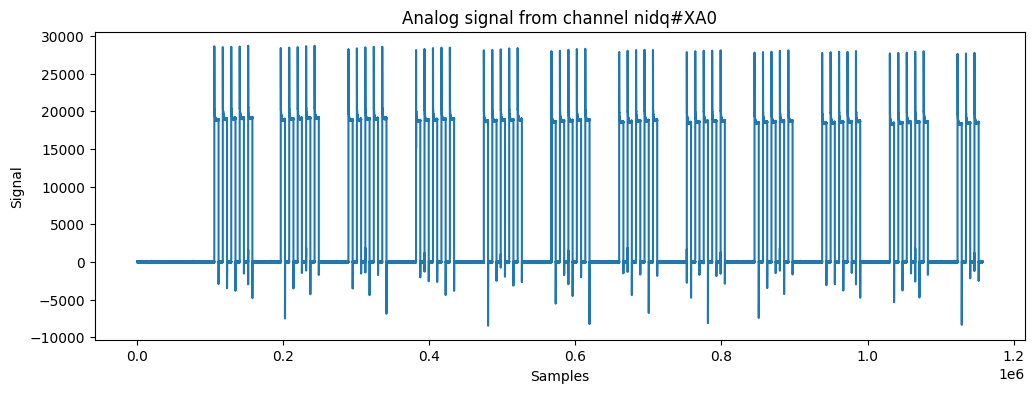

In [60]:

# Get sampling frequency
channel_idx = 0# or 1, 2, etc., depending on which channel you want
channel_id = event.get_channel_ids()[channel_idx]

# Get trace from that single channel (e.g., first 5 seconds)
sf = event.get_sampling_frequency()
duration = 100  # seconds
trace = event.get_traces(
    start_frame=0,
    end_frame=int(sf * duration),
    channel_ids=[channel_id]
)

# Plot
plt.figure(figsize=(12, 4))
plt.plot(trace[:, 0])
plt.title(f"Analog signal from channel {channel_id}")
plt.xlabel("Samples")
plt.ylabel("Signal")
plt.show()


In [61]:
import numpy as np
channel_ids = event.get_channel_ids()
ttl_channel_idx = 0
trace = event.get_traces(channel_ids=[channel_ids[ttl_channel_idx]])

# Detect rising edges (assuming TTL goes from 0 to high value)
threshold = 2500  # Adjust based on signal
above_thresh = trace[:, 0] > threshold
rising_edges = np.where(np.diff(above_thresh.astype(int)) == 1)[0]

# Convert to times in seconds
rising_times = rising_edges / sf
print("TTL rising edge times:", rising_times)
print(len(rising_times))
df = pd.DataFrame(rising_times)
df.to_csv('C:/Users/Freitag/Desktop/soundtry.csv')


TTL rising edge times: [  9.14141545  10.14144137  11.14146729  12.14149321  13.14151913
  16.99845339  17.99839291  18.99850523  19.99853115  20.99847067
  25.00220327  26.00231559  27.00234152  28.00228103  29.00230695
  33.0012874   34.00139973  35.00133924  36.00136516  37.00139108
  41.01739288  42.0173324   43.01744472  44.01738424  45.01741016
  49.01872349  50.018663    51.01877533  52.01871484  53.01874077
  57.02376941  58.02379533  59.02373485  60.02376077  61.02370029
  65.02492721  66.02486672  67.02489264  68.02483216  69.02494449
  73.0352437   74.03518322  75.03529554  76.03532146  77.03526098
  81.03493265  82.03495857  83.03498449  84.03492401  85.03503633
  89.04144742  90.04147334  91.04149926  92.04152518  93.0414647
  97.04640694  98.04634646  99.04645878 100.0463983  101.04642422
 105.05205768 106.05217001 107.05219593 108.05213545 109.05216137
 113.05304267 114.0530686  115.05300811 116.05312044 117.05314636
 121.05938464 122.05932416 123.05935008 124.0592896  1

TTL rising edge times: [  9.14150185  10.14144137  11.14146729  12.14149321  13.14151913
  16.99845339  17.99847931  18.99850523  19.99853115  20.99847067
  25.00228967  26.00231559  27.00234152  28.00236744  29.00230695
  33.0013738   34.00139973  35.00142565  36.00136516  37.00139108
  41.01739288  42.0174188   43.01744472  44.01747064  45.01741016
  49.01872349  50.01874941  51.01877533  52.01880125  53.01874077
  57.02376941  58.02379533  59.02382125  60.02376077  61.02378669
  65.02492721  66.02495313  67.02489264  68.02491857  69.02494449
  73.0352437   74.03526962  75.03529554  76.03532146  77.03526098
  81.03501905  82.03495857  83.03498449  84.03501041  85.03503633
  89.04144742  90.04147334  91.04149926  92.04152518  93.0415511
  97.04640694  98.04643286  99.04645878 100.0464847  101.04642422
 105.05214409 106.05217001 107.05219593 108.05213545 109.05216137
 113.05312908 114.0530686  115.05309452 116.05312044 117.05314636
 121.05938464 122.05941056 123.05935008 124.059376   1

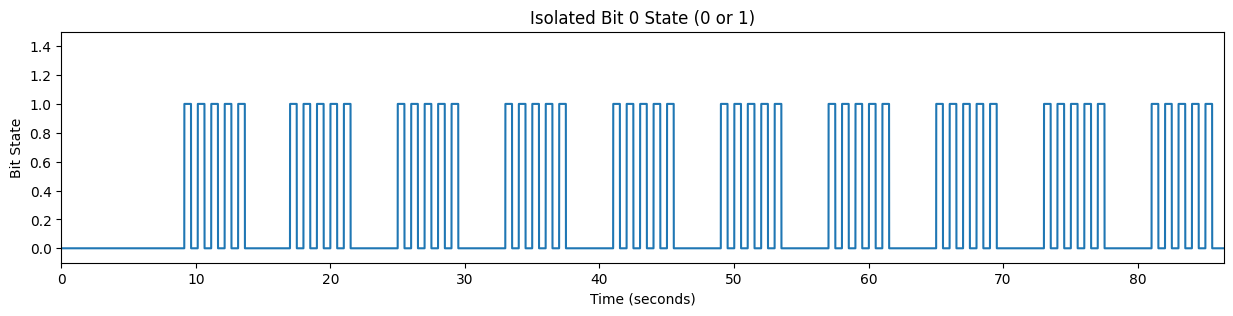

Extracted TTL event timestamps for bit 0 saved to ttl_0.csv


In [52]:
import numpy as np
channel_ids = event.get_channel_ids()
ttl_channel_idx = 8
trace = event.get_traces(channel_ids=[channel_ids[ttl_channel_idx]])

# Detect rising edges (assuming TTL goes from 0 to high value)
threshold = 0.5 # Adjust based on signal
above_thresh = trace[:, 0] > threshold
rising_edges = np.where(np.diff(above_thresh.astype(int)) == 1)[0]

# Convert to times in seconds
rising_times = rising_edges / sf
print("TTL rising edge times:", rising_times)
print(len(rising_times))
df = pd.DataFrame(rising_times)
df.to_csv('C:/Users/Freitag/Desktop/digital1.csv')


def extract_and_save_ttl_events(data, bits, save_path):
    digital_signals = data.get_traces()
    digital_word = digital_signals[:, 8]
    print(digital_word)
    sampling_rate = data.get_sampling_frequency()
    for bit in bits:
        # Extract TTL pulses for the current bit
        ttl_timestamps = extract_ttl_from_bit(digital_word, bit, sampling_rate)
        
        ttl_df = pd.DataFrame(ttl_timestamps, columns=['timestamps'])
        
        filename = f'ttl_{bit}.csv'
        
        ttl_df.to_csv(f"{save_path}/{filename}", index=False)
        print(f"Extracted TTL event timestamps for bit {bit} saved to {filename}")


def extract_ttl_from_bit(digital_word, bit, sampling_rate):
    # Extract the specific bit from the word (bit-shifting and masking)
    ttl_signal = (digital_word >> bit) & 1  # Isolate bit
    
    # Define how many samples to plot (e.g., 100,000 samples)
    num_samples_to_plot = 1000000
    time_axis = np.arange(num_samples_to_plot) / sampling_rate  # Convert to seconds

    # --- Add plotting ---
    plt.figure(figsize=(15, 3))
    plt.plot(time_axis, ttl_signal[:num_samples_to_plot])
    plt.title(f'Isolated Bit {bit} State (0 or 1)')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Bit State')
    plt.ylim(-0.1, 1.5)
    plt.xlim(0, num_samples_to_plot / sampling_rate)
    plt.show()
    # --- End plotting ---
    
    # Detect rising edges (0 -> 1 transitions)
    ttl_rising_edges = np.where(np.diff(ttl_signal) > 0)[0]

    # Convert sample indices to timestamps (in seconds)
    ttl_timestamps = ttl_rising_edges / sampling_rate
    
    return ttl_timestamps


bits_to_extract = [0]  
extract_and_save_ttl_events(event , bits_to_extract, 'C:/Users/Freitag/Desktop')


Using channel ID: nidq#XA0
Sampling frequency: 11573.7 Hz
Loading traces...
Signal loaded. Duration: 173.65 s, Samples: 1873911
Preprocessing signal...
Applying moving average smoothing with window: 11 samples (1 ms)
Calculating detection threshold...
Estimated noise level (robust std dev): 1748
Calculated threshold: 1.753e+06
Found 95 potential threshold crossings.
Debouncing events...
Found 95 events after debouncing.
Identifying main and sub-repeat structure...

--- Results ---
Detected 19 main repeats.
Detected 95 total sub-repeats.

Start times of Main Repeats (seconds):
[  9.14150185  16.99845339  25.00228967  33.0013738   41.01739288
  49.01872349  57.02376941  65.02492721  73.0352437   81.03501905
  89.04144742  97.04640694 105.05214409 113.05312908 121.05938464
 129.06581301 137.07664792 145.07875615 153.08328365]

Start times of Sub-Repeats within each Main Repeat (seconds):
  Main Repeat 1 (starts at 9.142s):
    [ 9.14150185 10.14144137 11.14146729 12.14149321 13.14151913]


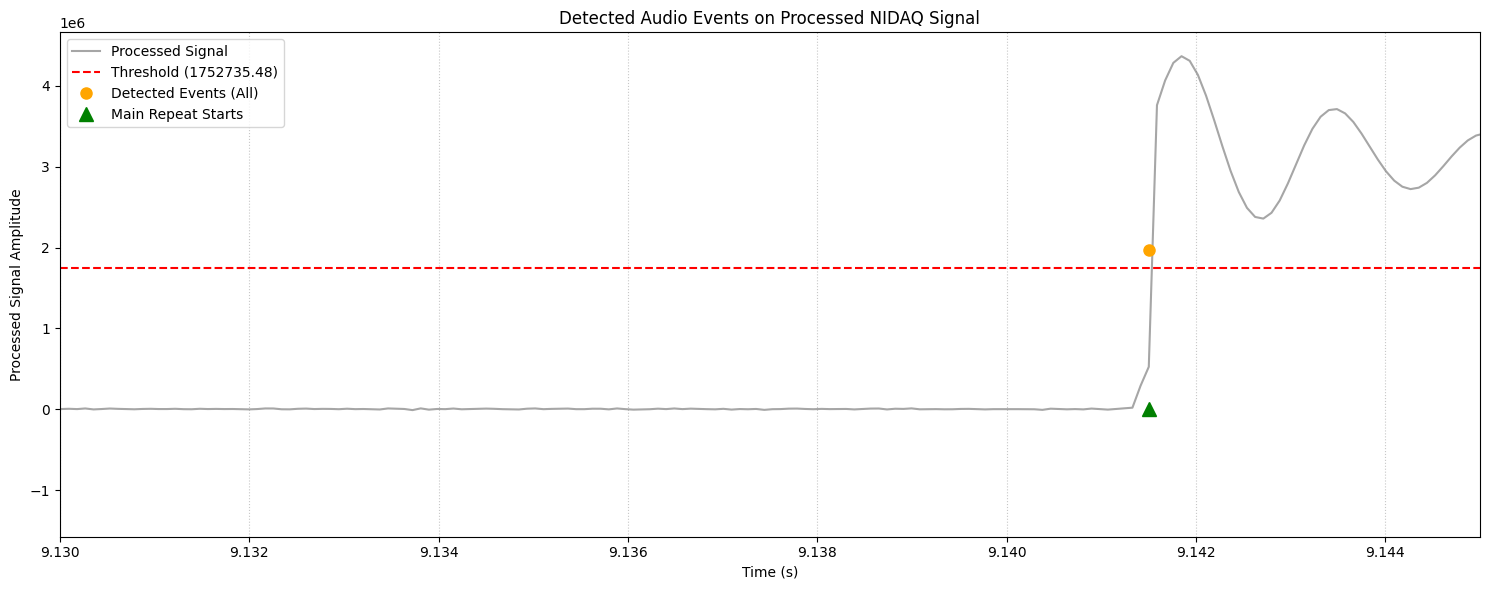

In [65]:
import spikeinterface as si
import spikeinterface.extractors as se
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
# Adjust these based on your signal characteristics and sampling frequency

# Preprocessing
smoothing_window_ms = 1  # Smoothing window in milliseconds (adjust as needed, 0 to disable)

# Detection
threshold_factor = 1000 # How many times above noise level to set threshold (adjust based on SNR)
debounce_interval_ms = 600 # Minimum time between detected events (ms) - should be < 500ms

# Hierarchy Identification
expected_sub_repeat_interval_s = 1 # Expected time between sub-repeats (seconds)
sub_repeat_interval_tolerance_s = 0.090 # Tolerance for sub-repeat interval (seconds)
# Assume gap between main repeats is significantly larger than sub-repeat gap + tolerance
main_repeat_separation_threshold_s = 2.9 # e.g., > 0.8s

# --- Assume 'recording' is your loaded SpikeInterface Recording object ---
# Example loading (replace with your actual loading code)
# recording = se.read_nidq('path/to/your/nidq/recording') 
# Or if already loaded:
# recording = my_loaded_recording_object 

# --- Make sure you have a recording object for this example ---
# Creating a dummy recording for demonstration if you don't have one loaded
try:
    recording # Check if recording exists
except NameError:
    print("Creating a dummy recording for demonstration purposes.")
    sampling_frequency = 30000 # Hz
    traces = np.random.randn(sampling_frequency * 60, 1) * 0.1 # 60 seconds of noise
    # Add some simulated events (replace with your actual data)
    event_times_s = []
    t_start = 5.0
    for main_rep in range(3): # Simulate 3 main repeats instead of 25
        main_start = t_start
        for sub_rep in range(5):
             start_idx = int((main_start + sub_rep * 0.6) * sampling_frequency) # Approx 0.5s silence + 0.1s signal
             end_idx = start_idx + int(0.1 * sampling_frequency) # 100ms signal
             if end_idx < len(traces):
                 traces[start_idx:end_idx, 0] += np.sin(np.linspace(0, 10*np.pi, end_idx-start_idx)) * 1.0 # Add signal burst
             event_times_s.append(main_start + sub_rep * 0.6)
        t_start += 5 * 0.6 + 1.0 # Add longer gap between main repeats
    recording = se.NumpyRecording([traces], sampling_frequency=sampling_frequency)
    print(f"Dummy event times: {event_times_s}")
# --------------------------------------------------------------------

# --- Select the relevant channel ---
# If your NIDAQ signal is on a specific channel, select it.
# Replace 'channel_id_of_interest' with the actual ID if known.
# If it's single channel, channel_ids[0] should work.
if len(recording.get_channel_ids()) > 1:
    # Option 1: Choose a specific channel ID (replace 'your_channel_id')
    # channel_id_to_use = 'your_channel_id' 
    # Option 2: Just use the first channel (common for Aux signals)
    channel_id_to_use = recording.get_channel_ids()[0] 
    print(f"Using channel ID: {channel_id_to_use}")
elif len(recording.get_channel_ids()) == 1:
     channel_id_to_use = recording.get_channel_ids()[0]
     print(f"Using the only available channel ID: {channel_id_to_use}")
else:
    raise ValueError("Recording has no channels!")

# Ensure we work with a single channel recording view
recording_ch = recording.channel_slice([channel_id_to_use])

# --- Get Signal Data ---
fs = recording_ch.get_sampling_frequency()
print(f"Sampling frequency: {fs} Hz")

# Process in chunks if the recording is very long to avoid memory issues
# For simplicity, loading all at once here. Adapt if needed.
print("Loading traces...")
signal = recording_ch.get_traces(segment_index=0, return_scaled=True).flatten()
times = recording_ch.get_times(segment_index=0)
print(f"Signal loaded. Duration: {times[-1]:.2f} s, Samples: {len(signal)}")

# --- 1. Preprocessing ---
print("Preprocessing signal...")
# Rectify (take absolute value)
processed_signal = np.abs(signal)

# Optional: Smoothing (moving average)
window_samples = int(smoothing_window_ms * fs / 1000)
if window_samples > 1:
    print(f"Applying moving average smoothing with window: {window_samples} samples ({smoothing_window_ms} ms)")
    processed_signal = np.convolve(processed_signal, np.ones(window_samples)/window_samples, mode='same')
else:
    print("Smoothing disabled or window too small.")

# --- 2. Thresholding ---
print("Calculating detection threshold...")
# Estimate noise level using Median Absolute Deviation (MAD) for robustness
median_val = np.median(processed_signal)
mad = np.median(np.abs(processed_signal - median_val))

if mad == 0:
    # Handle cases with very little noise or flat signal
    noise_level_est = np.std(processed_signal) 
    print(f"Warning: MAD is zero. Using standard deviation {noise_level_est:.4g} as noise estimate.")
    if noise_level_est == 0:
         raise ValueError("Signal appears to be completely flat. Cannot set threshold.")
else:
    # Convert MAD to equivalent standard deviation for Gaussian noise
    noise_level_est = mad * 1.4826 
    
threshold = median_val + threshold_factor * noise_level_est
print(f"Estimated noise level (robust std dev): {noise_level_est:.4g}")
print(f"Calculated threshold: {threshold:.4g}")

# Find samples where the signal crosses *above* the threshold
above_threshold = processed_signal > threshold
crossings_indices = np.where(np.diff(above_threshold.astype(int)) > 0)[0] + 1 # Add 1 to get the first index *above* threshold

print(f"Found {len(crossings_indices)} potential threshold crossings.")

# --- 3. Debouncing ---
print("Debouncing events...")
debounce_samples = int(debounce_interval_ms * fs / 1000)
if len(crossings_indices) > 0:
    event_indices = [crossings_indices[0]]
    for idx in crossings_indices[1:]:
        if idx - event_indices[-1] >= debounce_samples:
            event_indices.append(idx)
    event_indices = np.array(event_indices)
else:
    event_indices = np.array([])

event_times = event_indices / fs # Convert sample indices to time in seconds
print(f"Found {len(event_times)} events after debouncing.")

# --- 4. Hierarchical Grouping ---
print("Identifying main and sub-repeat structure...")
sub_repeat_start_times = [] # List of arrays, each array contains times for one main repeat
main_repeat_start_times = []

if len(event_times) > 0:
    # First event always starts a main repeat and its first sub-repeat
    main_repeat_start_times.append(event_times[0])
    current_sub_group = [event_times[0]]

    if len(event_times) > 1:
        inter_event_intervals = np.diff(event_times)

        for i, interval in enumerate(inter_event_intervals):
            current_event_time = event_times[i + 1]

            # Check if interval suggests a new main repeat
            if interval > main_repeat_separation_threshold_s:
                # End of the previous main repeat's sub-group
                sub_repeat_start_times.append(np.array(current_sub_group))
                # Start of a new main repeat
                main_repeat_start_times.append(current_event_time)
                current_sub_group = [current_event_time] # Start new sub-group
            # Check if interval matches expected sub-repeat separation
            elif abs(interval - expected_sub_repeat_interval_s) <= sub_repeat_interval_tolerance_s:
                current_sub_group.append(current_event_time)
            else:
                # Interval doesn't fit either pattern
                print(f"Warning: Unexpected interval {interval:.3f}s between event at {event_times[i]:.3f}s and {current_event_time:.3f}s. "
                      f"This event might be noise or indicate timing issues. It won't be grouped.")
                # Decide how to handle - here we just don't add it to the current_sub_group

    # Add the last collected sub-group
    if current_sub_group:
        sub_repeat_start_times.append(np.array(current_sub_group))

# Convert main repeats list to numpy array for consistency
main_repeat_start_times = np.array(main_repeat_start_times)

print("\n--- Results ---")
print(f"Detected {len(main_repeat_start_times)} main repeats.")
print(f"Detected {sum(len(sub_group) for sub_group in sub_repeat_start_times)} total sub-repeats.")

print("\nStart times of Main Repeats (seconds):")
print(main_repeat_start_times)

print("\nStart times of Sub-Repeats within each Main Repeat (seconds):")
for i, sub_group in enumerate(sub_repeat_start_times):
    print(f"  Main Repeat {i+1} (starts at {main_repeat_start_times[i]:.3f}s):")
    print(f"    {sub_group}")

# --- Optional: Verification Plot ---
print("\nGenerating verification plot...")
plt.figure(figsize=(15, 6))
plt.plot(times- min(times),signal, label='Processed Signal', alpha=0.7, color='gray')
plt.axhline(threshold, color='r', linestyle='--', label=f'Threshold ({threshold:.2f})')

# Plot detected events (all after debouncing)
plt.plot(event_times, processed_signal[event_indices], 'o', color='orange', markersize=8, label='Detected Events (All)')

# Mark main repeat starts differently
if len(main_repeat_start_times) > 0:
     main_repeat_indices = np.searchsorted(times, main_repeat_start_times)
     # Clip indices to be within bounds
     main_repeat_indices = np.clip(main_repeat_indices, 0, len(processed_signal) - 1)
     plt.plot(main_repeat_start_times, processed_signal[main_repeat_indices], '^', color='green', markersize=10, label='Main Repeat Starts')


plt.title('Detected Audio Events on Processed NIDAQ Signal')
plt.xlabel('Time (s)')
plt.ylabel('Processed Signal Amplitude')
plt.legend()
plt.grid(True, axis='x', linestyle=':', alpha=0.7)
# Optional: Zoom into a specific time range if needed
plt.xlim(9.13, 9.145)
#plt.ylim(-3000,3000)
plt.tight_layout()
plt.show()

In [66]:
import pandas as pd # Add this import at the top of your script if not already there
import os # To handle file paths

# --- Add this section after the results printing and plotting ---

print("\n--- Exporting Results to CSV ---")

# Define output filenames
output_dir = "C:/Users/Freitag/Desktop" # Save in the current directory, change if needed
combined_csv_filename = os.path.join(output_dir, "audio_event_times_combined.csv")
# Optional: Define names if saving as two separate files
# main_repeats_csv_filename = os.path.join(output_dir, "main_repeat_times.csv")
# sub_repeats_csv_filename = os.path.join(output_dir, "sub_repeat_times_detailed.csv")


# --- Option 1: Save as a Single Combined CSV (Recommended) ---
# Structure: Each row is a sub-repeat, with info about its parent main repeat.
event_data_list = []
if len(main_repeat_start_times) > 0 and len(sub_repeat_start_times) == len(main_repeat_start_times):
    for i, main_start_time in enumerate(main_repeat_start_times):
        # Ensure we have sub-repeat data for this main repeat
        if i < len(sub_repeat_start_times):
             current_sub_group = sub_repeat_start_times[i]
             for j, sub_start_time in enumerate(current_sub_group):
                 event_data_list.append({
                     'main_repeat_index': i + 1, # 1-based index for main repeat
                     'main_repeat_start_time_s': main_start_time,
                     'sub_repeat_index_within_main': j + 1, # 1-based index for sub-repeat within main
                     'sub_repeat_start_time_s': sub_start_time
                 })
        else:
             print(f"Warning: Missing sub-repeat data for main repeat index {i} (start time {main_start_time}). Skipping.")
             # Optionally add a row indicating the main repeat was found but sub-repeats were missing/problematic
             # event_data_list.append({
             #     'main_repeat_index': i + 1,
             #     'main_repeat_start_time_s': main_start_time,
             #     'sub_repeat_index_within_main': None, # Or 0, or NaN
             #     'sub_repeat_start_time_s': None # Or NaN
             # })


    if event_data_list:
        # Create DataFrame
        combined_df = pd.DataFrame(event_data_list)
        
        # Save to CSV
        try:
            combined_df.to_csv(combined_csv_filename, index=False, float_format='%.6f')
            print(f"Successfully saved combined event data to: {combined_csv_filename}")
        except Exception as e:
            print(f"Error saving combined CSV file: {e}")
    else:
        print("No event data structures generated to save.")
        
elif len(main_repeat_start_times) > 0:
     print("Warning: Mismatch between number of main repeats and sub-repeat groups. Saving main repeats only.")
     # Fallback to saving just main repeats if sub-repeat structure is inconsistent
     main_df = pd.DataFrame({'main_repeat_start_time_s': main_repeat_start_times})
     try:
        main_df.to_csv(os.path.join(output_dir, "main_repeat_times_only.csv"), index=False, float_format='%.6f')
        print(f"Successfully saved main repeat times only to: {os.path.join(output_dir, 'main_repeat_times_only.csv')}")
     except Exception as e:
        print(f"Error saving main repeats CSV file: {e}")
else:
    print("No main repeats detected, skipping CSV export.")





--- Exporting Results to CSV ---
Successfully saved combined event data to: C:/Users/Freitag/Desktop\audio_event_times_combined.csv
